# The Fundamentals Of Autograd

In [2]:
import  torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

Setting the `requires_grad=True` flag means that in every computation that follows, autograd will be accumulating the history of the computation in the output tensors of that computation.

In [3]:
a = torch.linspace(0, 2 * math.pi, steps=50, requires_grad=True)
print(a)

tensor([0.0000, 0.1282, 0.2565, 0.3847, 0.5129, 0.6411, 0.7694, 0.8976, 1.0258,
        1.1541, 1.2823, 1.4105, 1.5387, 1.6670, 1.7952, 1.9234, 2.0517, 2.1799,
        2.3081, 2.4363, 2.5646, 2.6928, 2.8210, 2.9493, 3.0775, 3.2057, 3.3339,
        3.4622, 3.5904, 3.7186, 3.8468, 3.9751, 4.1033, 4.2315, 4.3598, 4.4880,
        4.6162, 4.7444, 4.8727, 5.0009, 5.1291, 5.2574, 5.3856, 5.5138, 5.6420,
        5.7703, 5.8985, 6.0267, 6.1550, 6.2832], requires_grad=True)


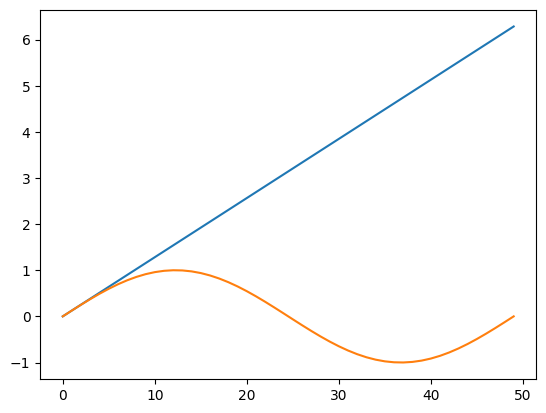

In [7]:
b = torch.sin(a)
plt.plot(a.detach())
plt.plot(b.detach())

In [8]:
print(b)

tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
         5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
         9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
         9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
         5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
        -6.4070e-02, -1.9116e-01, -3.1511e-01, -4.3388e-01, -5.4553e-01,
        -6.4823e-01, -7.4028e-01, -8.2017e-01, -8.8660e-01, -9.3847e-01,
        -9.7493e-01, -9.9538e-01, -9.9949e-01, -9.8718e-01, -9.5867e-01,
        -9.1441e-01, -8.5514e-01, -7.8183e-01, -6.9568e-01, -5.9811e-01,
        -4.9072e-01, -3.7527e-01, -2.5365e-01, -1.2788e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [9]:
c = 2 * b
print(c)

d = c + 1
print(d)


tensor([ 0.0000e+00,  2.5575e-01,  5.0731e-01,  7.5053e-01,  9.8144e-01,
         1.1962e+00,  1.3914e+00,  1.5637e+00,  1.7103e+00,  1.8288e+00,
         1.9173e+00,  1.9744e+00,  1.9990e+00,  1.9908e+00,  1.9499e+00,
         1.8769e+00,  1.7732e+00,  1.6403e+00,  1.4806e+00,  1.2965e+00,
         1.0911e+00,  8.6777e-01,  6.3022e-01,  3.8232e-01,  1.2814e-01,
        -1.2814e-01, -3.8232e-01, -6.3022e-01, -8.6777e-01, -1.0911e+00,
        -1.2965e+00, -1.4806e+00, -1.6403e+00, -1.7732e+00, -1.8769e+00,
        -1.9499e+00, -1.9908e+00, -1.9990e+00, -1.9744e+00, -1.9173e+00,
        -1.8288e+00, -1.7103e+00, -1.5637e+00, -1.3914e+00, -1.1962e+00,
        -9.8144e-01, -7.5053e-01, -5.0731e-01, -2.5575e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000,  1.2558,  1.5073,  1.7505,  1.9814,  2.1962,  2.3914,  2.5637,
         2.7103,  2.8288,  2.9173,  2.9744,  2.9990,  2.9908,  2.9499,  2.8769,
         2.7732,  2.6403,  2.4806,  2.2965,  2.0911,  1.8678,  1.6302,  1.3823

In [10]:
out = d.sum()
print(out)

tensor(50., grad_fn=<SumBackward0>)


In [14]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:\n',b.grad_fn)
print('\na:\n',a.grad_fn)

d:
((<MulBackward0 object at 0x1689acdc0>, 0), (None, 0))
((<SinBackward0 object at 0x1689acdc0>, 0), (None, 0))
((<AccumulateGrad object at 0x1689ae740>, 0),)
()

c:

b:

a:
 None


tensor([ 2.0000,  1.9836,  1.9346,  1.8538,  1.7426,  1.6028,  1.4367,  1.2470,
         1.0368,  0.8096,  0.5691,  0.3192,  0.0641, -0.1920, -0.4450, -0.6907,
        -0.9251, -1.1442, -1.3446, -1.5229, -1.6762, -1.8019, -1.8981, -1.9631,
        -1.9959, -1.9959, -1.9631, -1.8981, -1.8019, -1.6762, -1.5229, -1.3446,
        -1.1442, -0.9251, -0.6907, -0.4450, -0.1920,  0.0641,  0.3192,  0.5691,
         0.8096,  1.0368,  1.2470,  1.4367,  1.6028,  1.7426,  1.8538,  1.9346,
         1.9836,  2.0000])


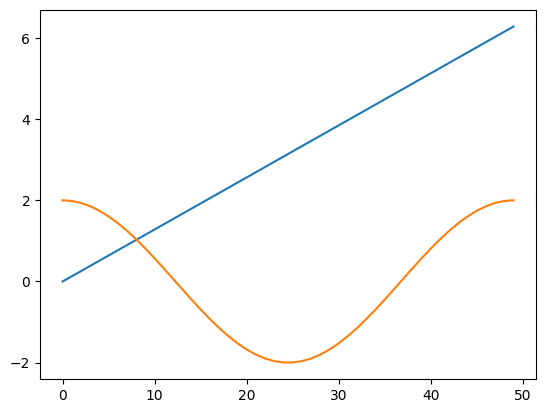

In [15]:
out.backward()
print(a.grad)

plt.plot(a.detach())
plt.plot(a.grad.detach())

Be aware that only *leaf nodes* of the computation have their gradients computed. If you tried, for example, `print(c.grad)` you’d get back `None`. In this simple example, only the input is a leaf node, so only it has gradients computed.

### Autograd in Training

Within a subclass of `torch.nn.Module`, it’s assumed that we want to track gradients on the layers’ weights for learning.

In [19]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()


In [20]:
print(model)
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

TinyModel(
  (layer1): Linear(in_features=1000, out_features=100, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=100, out_features=10, bias=True)
)
tensor([-0.0913,  0.0262,  0.0544,  0.0453, -0.0550, -0.0919,  0.0704,  0.0508,
        -0.0283, -0.0389], grad_fn=<SliceBackward0>)
None


In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(191.1616, grad_fn=<SumBackward0>)


In [22]:
loss.backward()

print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0913,  0.0262,  0.0544,  0.0453, -0.0550, -0.0919,  0.0704,  0.0508,
        -0.0283, -0.0389], grad_fn=<SliceBackward0>)
tensor([-1.0356, -0.0750,  2.6439,  7.0875,  4.9051,  3.1536,  0.8866,  2.6202,
         6.5571,  2.3121])


We can see that the gradients have been computed for each learning weight, but the weights remain unchanged, because we haven’t run the optimizer yet. The optimizer is responsible for updating model weights based on the computed gradients.

In [23]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0903,  0.0263,  0.0517,  0.0382, -0.0599, -0.0951,  0.0695,  0.0482,
        -0.0348, -0.0412], grad_fn=<SliceBackward0>)
tensor([-1.0356, -0.0750,  2.6439,  7.0875,  4.9051,  3.1536,  0.8866,  2.6202,
         6.5571,  2.3121])


One important thing about the process: After calling `optimizer.step()`, you need to call `optimizer.zero_grad()`, or else every time you run loss.`backward()`, the gradients on the learning weights will accumulate:

In [24]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0,5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)
print(model.layer2.weight.grad[0][0:10])


tensor([-1.0356, -0.0750,  2.6439,  7.0875,  4.9051,  3.1536,  0.8866,  2.6202,
         6.5571,  2.3121])
tensor([-5.8541,  6.5707, 12.3284,  6.2765, 21.4781, 26.8818,  1.1223,  7.3811,
        35.8862, 13.1116])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


After running `loss.backward()` multiple times, the magnitudes of most of the gradients will be much larger. Failing to zero the gradients before running your next training batch will cause the gradients to blow up in this manner, causing incorrect and unpredictable learning results.

### Turning Autograd Off and On

In [25]:
a = torch.ones(2,3,requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)
print(a)
print(b1)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)


If you only need autograd turned off temporarily, a better way is to use the `torch.no_grad()`:

In [26]:
a = torch.ones(2,3, requires_grad=True)
b = torch.ones(2,3, requires_grad=True)

c1 = a+b
print(c1)

with torch.no_grad():
    c2 = a+b

print(c2)

c3 = a * b
print(c3)

tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<AddBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]], grad_fn=<MulBackward0>)


`torch.no_grad()` can also be used as a function or method decorator:

In [27]:
def add_tensors1(x,y):
    return x + y

@torch.no_grad()
def add_tensors2(x,y):
    return x + y

a = torch.ones(2,3, requires_grad=True) * 2
b = torch.ones(2,3, requires_grad=True) * 3

c1 = add_tensors1(a,b)
print(c1)

c2 = add_tensors2(a,b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


There’s a corresponding context manager, `torch.enable_grad()`, for turning autograd on when it isn’t already. It may also be used as a decorator.

Finally, you may have a tensor that requires gradient tracking, but you want a copy that does not. For this we have the Tensor object’s `detach()` method - it creates a copy of the tensor that is detached from the computation history:

In [28]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.6144, 0.0108, 0.9311, 0.5467, 0.7524], requires_grad=True)
tensor([0.6144, 0.0108, 0.9311, 0.5467, 0.7524])


We did this above when we wanted to graph some of our tensors. This is because matplotlib expects a NumPy array as input, and the implicit conversion from a PyTorch tensor to a NumPy array is not enabled for tensors with requires_grad=True. Making a detached copy lets us move forward.

### Autograd and in-place operations

PyTorch will even stop you if you attempt an in-place operation on leaf variable that requires autograd, as shown below.

Be careful on using an in-place operation because we’ve used variables to capture the intermediate values of a computation. Autograd needs these intermediate values to perform gradient computations. 

## Autograd Profiler

Documentation Link: https://pytorch.org/docs/stable/autograd.html#profiler

Autograd tracks every step of your computation in detail. Such a computation history, combined with timing information, would make a handy profiler - and autograd has that feature baked in.

In [33]:
device = torch.device('cpu')
run_on_gpu = False

if torch.backends.mps.is_available():
    device = torch.device('mps')
    run_on_gpu = True

x = torch.randn(2,3, requires_grad=True)
y = torch.randn(2,3, requires_grad=True)
z = torch.randn(2,3, requires_grad=True)

# with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
#     for _ in range(5000):
#         z = (z/x) * y

def mps_synchronize():
    if torch.backends.mps.is_available():
        torch.mps.synchronize()

with torch.autograd.profiler.profile() as prof:
    for _ in range(100000):
        z = (z/x) * y
    torch.mps.synchronize()

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        51.00%       5.337ms        51.00%       5.337ms       1.067us          5000  
    aten::mul        49.00%       5.127ms        49.00%       5.127ms       1.025us          5000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 10.464ms



### More on Autograd Detail

For a multi-dimensional output, autograd expects us to provide gradients for those three outputs that it can multiply into the Jacobian:

In [34]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([  69.4743, -179.7487, 1813.9459], grad_fn=<MulBackward0>)


In [35]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [36]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


## High Level API

There is an API on autograd that gives you direct access to important differential matrix and vector operations. In particular, it allows you to calculate the Jacobian and the Hessian matrices of a particular function for particular inputs. (The Hessian is like the Jacobian, but expresses all partial second derivatives.) It also provides methods for taking vector products with these matrices.

In [38]:
def exp_adder(x,y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1))
print(inputs)

torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.0626]), tensor([0.7465]))


(tensor([[2.1291]]), tensor([[3.]]))

In [39]:
# We can also do the above for higher order tensors
inputs = (torch.rand(3), torch.rand(3))
print(inputs)

torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.3869, 0.6121, 0.1767]), tensor([0.8327, 0.6256, 0.7882]))


(tensor([[2.9448, 0.0000, 0.0000],
         [0.0000, 3.6886, 0.0000],
         [0.0000, 0.0000, 2.3866]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

The `torch.autograd.functional.hessian()` method works identically (assuming your function is twice differentiable), but returns a matrix of all second derivatives.

There is also a function to directly compute the vector-Jacobian product, if you provide the vector:

In [40]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1,1.0,0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 277.7870, 1198.3009, 1141.1086]),
 tensor([2.0480e+02, 2.0480e+03, 2.0480e-01]))

The `torch.autograd.functional.jvp()` method performs the same matrix multiplication as `vjp()` with the operands reversed. The `vhp()` and `hvp()` methods do the same for a vector-Hessian product.